In [1]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import keras as k
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!git clone https://github.com/amandeepsingh1111/Classification-Problem.git

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/amandeepsingh1111/Classification-Problem/master/FIFA.csv')

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
data.shape

(18207, 89)

In [7]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
data = data.drop(columns=['Unnamed: 0', 'ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo','Work Rate', 'Body Type', 'Real Face',
                          'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','Value', 'Wage','Height', 'Weight','Release Clause',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1)

In [9]:
print(data.shape)
data.head()

(18207, 43)


,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,Left,5.0,4.0,4.0,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,Right,5.0,4.0,5.0,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,Right,5.0,5.0,5.0,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,Right,4.0,3.0,1.0,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,Right,4.0,5.0,4.0,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [10]:
#### Target Distribution (Position)

fig = px.histogram(data, x="Position")
fig.show()

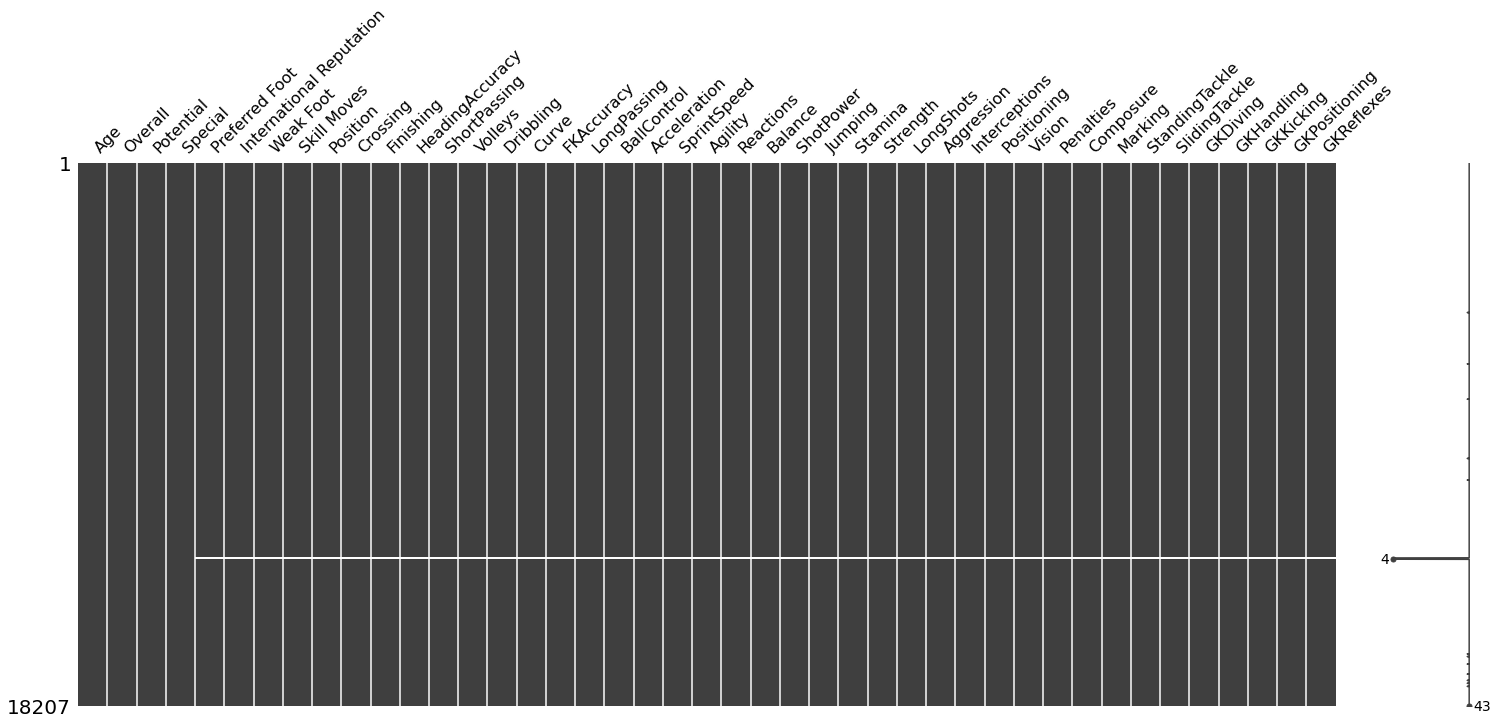

In [11]:
### identify null values 
import missingno as msno

msno.matrix(data);

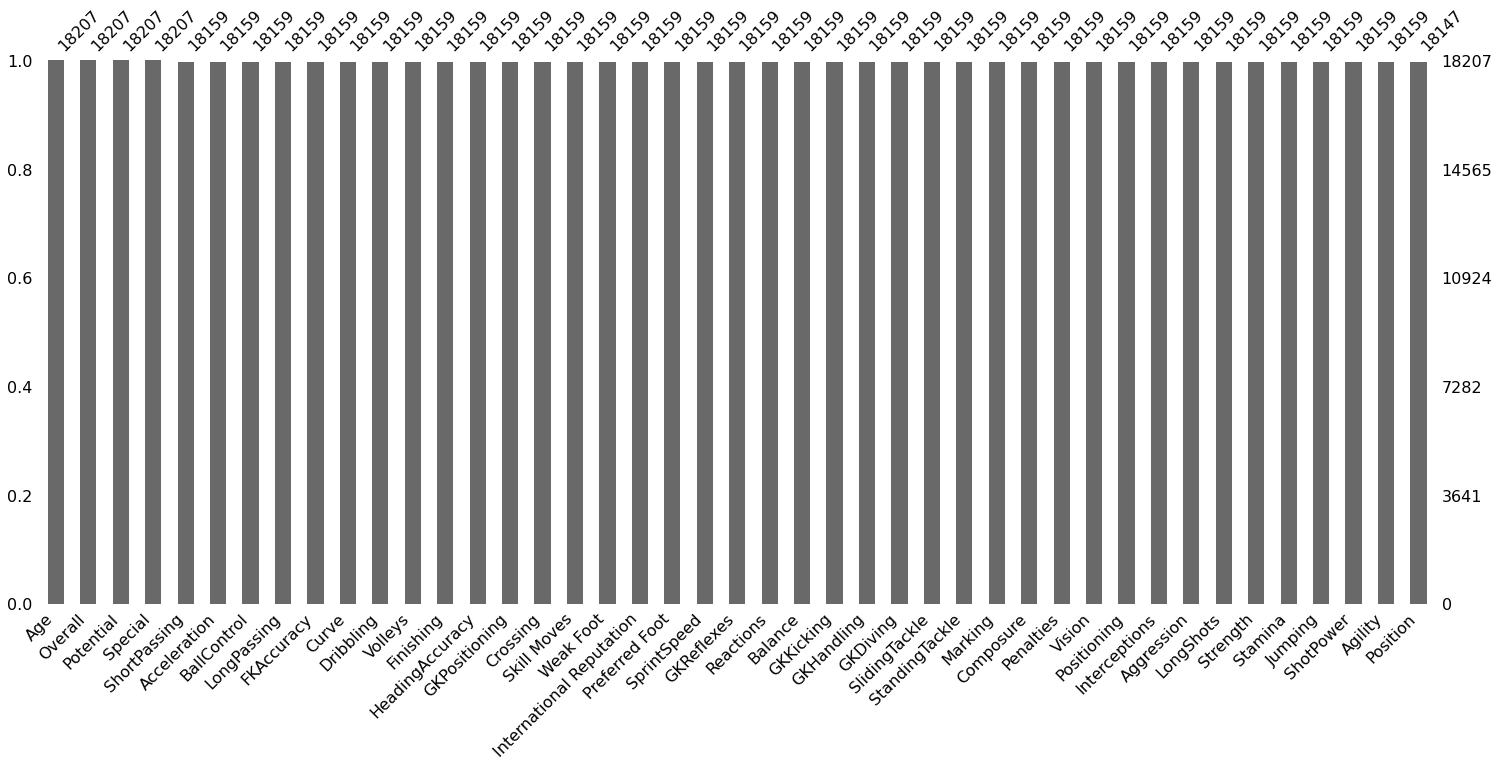

In [12]:
msno.bar(data, sort='descending');



```
A value near -1 means if one variable appears then the other variable is very likely to be missing.
A value near 0 means there is no dependence between the occurrence of missing values of two variables.
A value near 1 means if one variable appears then the other variable is very likely to be present.
```



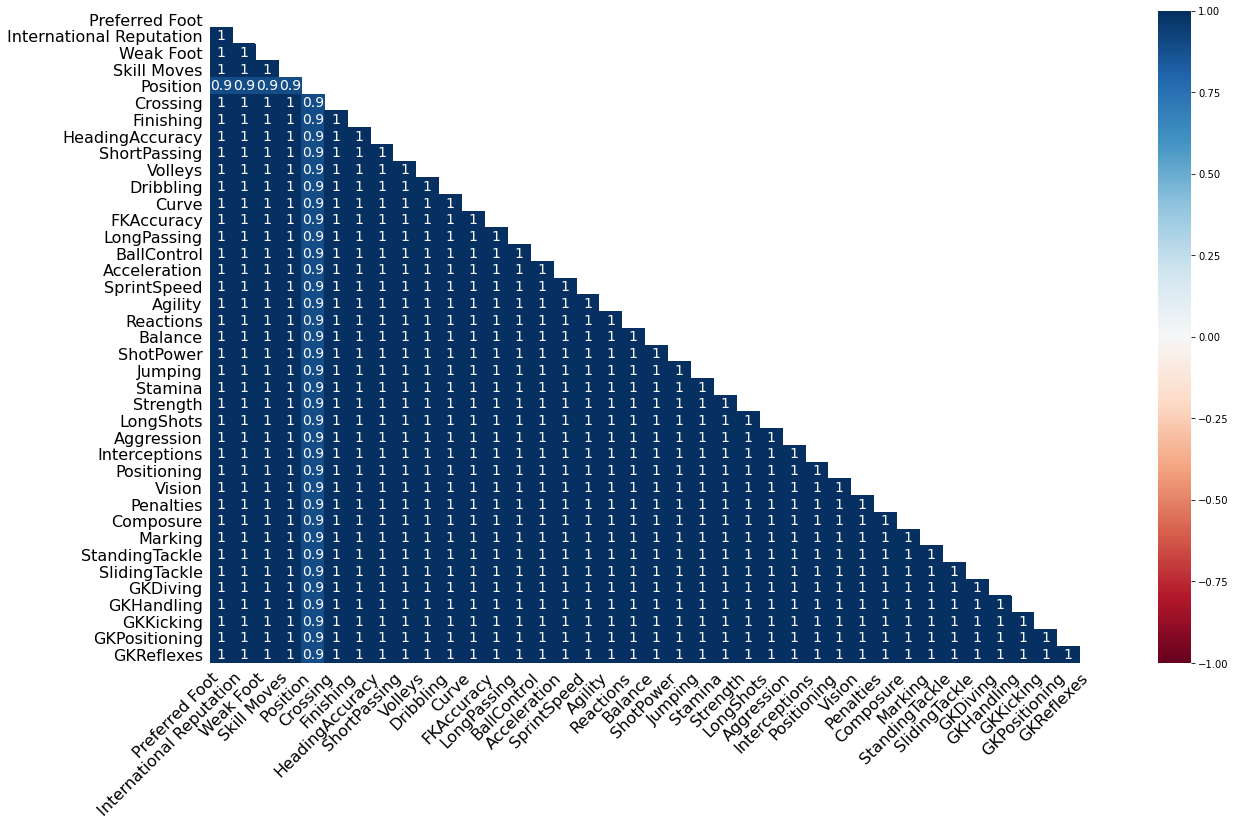

In [13]:
msno.heatmap(data);

In [14]:
#### Drop duplicate records
df =  data.drop_duplicates(ignore_index=True)

In [15]:
df.shape

(18206, 43)

In [16]:
### identify non-null values in target variable
notna = pd.notnull(df['Position'])

In [17]:
### dataset without null values in Target Variable
df = df[notna]

In [18]:
print(df.shape)
df['Position'].isnull().sum()

(18146, 43)


0

In [19]:
###### Unique values in Target Variable

df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [20]:
#### Noof unique values in each column

for col in df.columns:
  print(col," : ",df[col].nunique())

Age  :  29
Overall  :  48
Potential  :  47
Special  :  1422
Preferred Foot  :  2
International Reputation  :  5
Weak Foot  :  5
Skill Moves  :  5
Position  :  27
Crossing  :  89
Finishing  :  93
HeadingAccuracy  :  91
ShortPassing  :  85
Volleys  :  87
Dribbling  :  94
Curve  :  89
FKAccuracy  :  90
LongPassing  :  84
BallControl  :  90
Acceleration  :  86
SprintSpeed  :  85
Agility  :  81
Reactions  :  68
Balance  :  81
ShotPower  :  92
Jumping  :  74
Stamina  :  85
Strength  :  74
LongShots  :  92
Aggression  :  85
Interceptions  :  89
Positioning  :  94
Vision  :  85
Penalties  :  87
Composure  :  84
Marking  :  92
StandingTackle  :  90
SlidingTackle  :  88
GKDiving  :  71
GKHandling  :  70
GKKicking  :  79
GKPositioning  :  79
GKReflexes  :  76


In [21]:
###### grouping sub-positions in 3 major positions on football field

forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

In [22]:
######  Grouping all position category into 4 cat. goalkeeper, defenders, midfielders, forward

df.loc[df["Position"] == "GK", "Position"] = 0

df.loc[df["Position"].isin(defender_player), "Position"] = 1

df.loc[df["Position"].isin(midfielder_player), "Position"] = 2

df.loc[df["Position"].isin(forward_player), "Position"] = 3

In [23]:
df.sample()

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
16335,18,57,70,936,Right,1.0,3.0,1.0,0,14.0,9.0,10.0,30.0,5.0,13.0,12.0,12.0,25.0,20.0,38.0,35.0,36.0,45.0,45.0,19.0,67.0,30.0,55.0,7.0,28.0,12.0,7.0,33.0,10.0,30.0,9.0,11.0,14.0,61.0,56.0,55.0,53.0,60.0


In [24]:
#### Distribution of target variable after merging positions

fig = px.histogram(df, 'Position', nbins=4, width=600)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,2,3],
        ticktext = ['GoalKeepers', 'Defenders', 'Midfielders', 'Forwad']
    ))
fig.show()

In [25]:
#### Data types of every selected columns
df.dtypes

Age                           int64
Overall                       int64
Potential                     int64
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Position                     object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     float64
ShotPower                   float64
Jumping                     float64
Stamina                     float64
Strength                    

In [26]:
##### Convet categorical columns into one-hot & label-encoding

df = pd.get_dummies(df,columns=['Preferred Foot'], drop_first=True)

In [27]:
df.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot_Right
0,31,94,94,2202,5.0,4.0,4.0,3,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0
1,33,94,94,2228,5.0,4.0,5.0,3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1
2,26,92,93,2143,5.0,5.0,5.0,3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1
3,27,91,93,1471,4.0,3.0,1.0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1
4,27,91,92,2281,4.0,5.0,4.0,2,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1


In [28]:
##### Scaling the predictors for fitting the model

x = df.drop("Position", axis = 1)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = df["Position"]

**Converting prediction to categorical**

In [29]:
####### convert target variable into one-hot encoding, bcz target vriable is not binary it is multi-class
from keras.utils.np_utils import to_categorical

y_cat = to_categorical(y)

In [30]:
print(y_cat.shape,'\n')
y_cat

(18146, 4) 



array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [31]:
##### split data into testing and training data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat, test_size=0.2)

**built the model**

In [32]:
x_train.shape

(14516, 42)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(60, input_shape = (42,), activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "softmax"))
model.compile(Adam(learning_rate = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                2580      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                915       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 64        
Total params: 3,559
Trainable params: 3,559
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train, y_train, verbose=1, epochs=10)

Epoch 1/10
454/454 [==============================] - 16s 2ms/step - loss: 0.4513 - accuracy: 0.8203
Epoch 2/10
454/454 [==============================] - 1s 2ms/step - loss: 0.3227 - accuracy: 0.8714
Epoch 3/10
454/454 [==============================] - 1s 2ms/step - loss: 0.3079 - accuracy: 0.8690
Epoch 4/10
454/454 [==============================] - 1s 2ms/step - loss: 0.3015 - accuracy: 0.8817
Epoch 5/10
454/454 [==============================] - 1s 1ms/step - loss: 0.2830 - accuracy: 0.8863
Epoch 6/10
454/454 [==============================] - 1s 2ms/step - loss: 0.2711 - accuracy: 0.8913
Epoch 7/10
454/454 [==============================] - 1s 2ms/step - loss: 0.2866 - accuracy: 0.8817
Epoch 8/10
454/454 [==============================] - 1s 1ms/step - loss: 0.2798 - accuracy: 0.8857
Epoch 9/10
454/454 [==============================] - 1s 1ms/step - loss: 0.2906 - accuracy: 0.8814
Epoch 10/10
454/454 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.887

**We achieve around 88.8% accuracy within the first 10 epochs.**

**Confusion Matrix**

In [58]:
import plotly.figure_factory as ff

y_pred_class = model.predict_classes(x_test)
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)

data = confusion_matrix(y_test_class, y_pred_class)
x = ['GoalKeeper', 'Defender', 'Midfielder', 'Forward']
y = ['GoalKeeper', 'Defender', 'Midfielder', 'Forward']

fig = ff.create_annotated_heatmap(data, x=x, y=y, colorscale='Viridis',showscale=True)
fig.show()

**Another Way to draw confusion matrix**

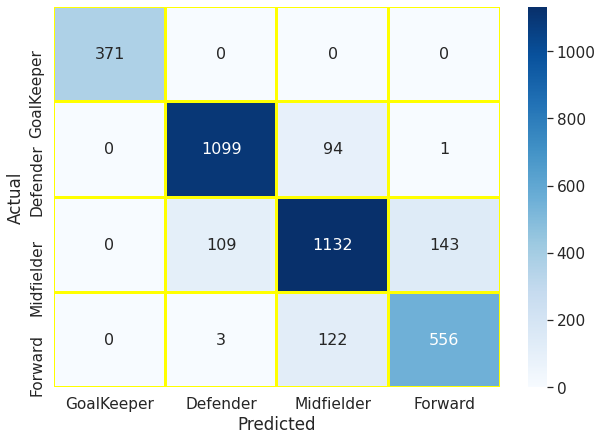

In [60]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

data = confusion_matrix(y_test_class, y_pred_class)
df_cm = pd.DataFrame(data, columns=['GoalKeeper', 'Defender', 'Midfielder', 'Forward'], index = ['GoalKeeper', 'Defender', 'Midfielder', 'Forward'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, fmt='d', linewidths=2, linecolor='yellow', cmap="Blues", annot=True,annot_kws={"size": 16});  # font size

**Classification Report**

In [65]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       0.91      0.92      0.91      1194
           2       0.84      0.82      0.83      1384
           3       0.79      0.82      0.81       681

    accuracy                           0.87      3630
   macro avg       0.89      0.89      0.89      3630
weighted avg       0.87      0.87      0.87      3630



In [73]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['  ','<b>precision</b>','<b>recall</b>','<b>f1-score</b>','<b>support</b>'],
                line_color='darkslategray',
                fill_color='cyan',
                align='center'),
    cells=dict(values=[['GoalKeeper', 'Defender', 'Midfielder', 'Forward'  ,   'accuracy','macro avg','weighted avg'], # 1st column
                       [1    ,   0.91     , 0.84    ,  0.79    , ' ', 0.89,0.87],
                       [1    ,   0.92   ,   0.82    ,  0.82   , ' ',  0.89,0.87],
                       [1    ,   0.91    ,  0.83    ,  0.81   ,    0.87,0.89,0.87],
                       [371  ,1194 , 1384, 681,   3630,3630,3630 ]
                       ],
               line_color='red',
                fill_color='yellow',
                align='center'))
])

fig.update_layout(width=800, height=500)
fig.show()